In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [5]:
df = df.drop('laptop_ID', axis=1)

In [6]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [7]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [8]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


In [10]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [11]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [12]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

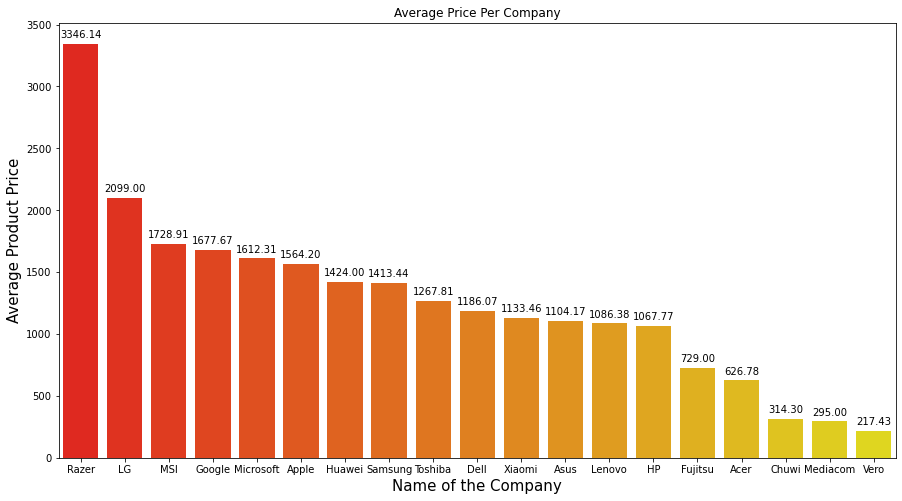

In [13]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [15]:
from pandas.core.dtypes.common import is_numeric_dtype
       

In [16]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])
        

In [17]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,56,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,50,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,52,4,1.86,575.00
3,1,300,4,15.4,25,85,16,29,8,8,1.83,2537.45
4,1,300,4,13.3,23,67,8,16,57,8,1.37,1803.60


In [18]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [19]:
# Splitting the data set
y = df.Price_euros
x = df.drop('Price_euros', axis =1)

In [20]:
from sklearn.model_selection import train_test_split as tts

In [21]:
xtrain, xtest, ytrain, ytest = tts(x,y,train_size=.70,random_state=1) # test_size=.30

In [22]:
xtrain.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
987,10,291,1,15.6,15,102,8,5,75,5,2.50
1146,7,110,4,12.5,8,88,8,16,46,7,1.26
1055,7,366,3,15.6,0,58,4,26,46,5,2.31
372,2,408,1,17.3,15,26,16,18,36,5,3.25
1273,7,2,3,15.6,0,89,6,10,20,5,2.19


In [23]:
ytrain.head()

987     1189.00
1146    2296.95
1055     705.15
372     2199.00
1273     764.00
Name: Price_euros, dtype: float64

In [24]:
xtest.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
644,0,127,3,15.6,0,56,4,26,46,5,2.40
1275,2,602,4,13.3,15,45,8,29,45,5,1.20
163,10,291,1,15.6,15,102,16,16,72,5,2.50
1008,7,362,3,14.0,8,74,8,16,66,5,1.64
909,9,193,4,14.0,13,97,8,29,52,5,0.98


In [25]:
ytest.head()

644      450.00
1275     729.00
163     1079.00
1008    1049.26
909     1899.00
Name: Price_euros, dtype: float64

# (1) Linear Regression for Multi variable 

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression() # creating object for linear model

In [28]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [29]:
# Finding coefficient and intercept

lr.coef_

array([ 1.29481744e+01,  9.83872059e-02,  4.02417798e+01, -8.14676096e+01,
        7.70144077e+00,  4.40925129e+00,  8.48949688e+01,  5.64777892e+00,
        3.76034983e+00,  8.78169601e+01,  1.10143811e+02])

In [30]:
lr.intercept_

80.48832917593359

In [31]:
predicted_price1 = lr.predict(xtest)

In [32]:
predicted_price1

array([ 552.56037332, 1140.41806282, 2007.0865437 , 1212.24459841,
       1349.75658553, 1146.22001696, 1162.23803884,  619.24914114,
        173.14784637, 1240.29604698, 1238.19385082, 1040.20947408,
       1404.46728203, 1491.91675125, 1235.27923408, 1804.16669492,
        889.07599099, 1195.33677265, 1060.47901263,  680.30024803,
        907.48017711,  623.14200412, 1997.13689424, 1382.65211056,
        659.70695491, 1638.72710941,  615.43954046, 1059.44551234,
       1236.12976919, 1384.64643667, 2049.30281734,  672.2662009 ,
       1152.10549286, 1376.47152221, 2110.02417574,  570.32748841,
        684.41384575,  653.53821886,  261.45750631, 1187.87136886,
       1052.33096448,  729.88940676,  726.51507699,  731.68152902,
       1259.92589383,  501.33630138,  858.46123341, 2000.40621916,
       1179.63621006, 2094.49208013, 1064.91581477, 1232.85580174,
       2012.32390929, 1268.19444329, 1164.36479904, 1064.81742756,
       1903.20196555, 1132.8197221 , 1084.19596708,  749.43602

In [33]:
#xtest['prediced_price1'] = lr.predict(xtest)

In [34]:
#xtest.head()

In [35]:
#import pandas as pd
#pd.concat([xtest,ytest], axis =1).head()

In [36]:
# Finding Accuracy R2 score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
linear_score = r2_score(ytest, predicted_price1)
print('r2 socre is  ',linear_score)

r2 socre is   0.6615488599822079


# (2)KNN Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
kr = KNeighborsRegressor()
kr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [39]:
kr.predict(xtest)

array([1521.   ,  561.   , 1215.   ,  889.5  , 1728.6  , 1054.998,
        625.2  ,  976.94 ,  286.8  , 1558.6  , 1668.068, 1049.8  ,
       2137.4  , 1653.4  , 1279.   , 1188.4  , 1088.4  , 1367.8  ,
       2021.58 , 1698.4  ,  731.8  ,  719.958, 1762.8  , 1267.6  ,
       1210.8  , 1162.328,  482.14 ,  566.6  ,  558.   ,  825.   ,
       2771.044,  660.6  , 1405.52 , 1310.8  , 1535.6  , 1082.58 ,
        741.176,  530.4  ,  460.714, 1218.92 , 1224.6  ,  477.2  ,
        655.896,  789.58 , 1415.18 ,  615.736, 1414.4  , 1579.   ,
        897.202, 2040.22 , 1243.86 , 1215.   , 1708.8  , 1151.   ,
       1031.6  , 1243.86 , 2297.27 , 1180.4  , 1210.4  ,  701.726,
       2208.6  , 1513.   , 2061.58 , 2355.172,  686.   , 1651.4  ,
        416.2  ,  323.4  , 2725.856,  561.   , 1237.946, 1366.6  ,
       1280.878, 1445.2  , 2308.77 , 1234.93 ,  899.4  ,  928.   ,
       1325.6  , 1755.496,  473.63 ,  990.932, 1050.   , 1089.962,
        453.8  , 1407.198, 1398.678, 1921.   ,  678.354,  418.

In [40]:
knn_score = kr.score(xtest, ytest)
knn_score

0.7509707555790827

# (3)XGBoost Regression

In [41]:
from xgboost import XGBRegressor

In [42]:
xgb = XGBRegressor()

In [43]:
xgb.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [44]:
xgb_score = xgb.score(xtest,ytest)

In [45]:
xgb_score


0.8589833112657055

# (4) AdaBoostRegressor

In [46]:
from sklearn.ensemble import AdaBoostRegressor

In [47]:
ada = AdaBoostRegressor()

In [48]:
ada.fit(xtrain,ytrain)

AdaBoostRegressor()

In [49]:
ada_score = ada.score(xtest,ytest)

In [50]:
ada_score

0.639617659417231

# (5) Decision tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
decision_tree = DecisionTreeRegressor()

In [53]:
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [54]:
decision_score = decision_tree.score(xtest,ytest)

In [55]:
decision_score

0.7418423316287606

# (6)Random forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
random_forest = RandomForestRegressor()

In [58]:
random_forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [59]:
random_score = random_forest.score(xtest,ytest)

In [60]:
random_score

0.8618866997043116

# Comparison of accuracy scores 

In [61]:
print("Linear Regression Score : ", linear_score)
print("KNN Regression Score : ", knn_score)
print("XGB Regression Score : ", xgb_score)
print("AdaBoost Regression Score : ", ada_score)
print("Decision Tree Regression Score : ", decision_score)
print("Random Forest Regression Score : ", random_score)

Linear Regression Score :  0.6615488599822079
KNN Regression Score :  0.7509707555790827
XGB Regression Score :  0.8589833112657055
AdaBoost Regression Score :  0.639617659417231
Decision Tree Regression Score :  0.7418423316287606
Random Forest Regression Score :  0.8618866997043116
